# Multinomial Logistic Regression (SoftMax) Exercise

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.style.use('ggplot')

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(1000, 2)
(1000,)


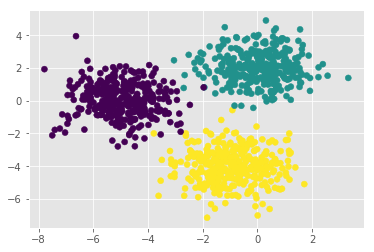

In [11]:
from sklearn.datasets import make_blobs
centers = [[-5, 0], [0, 2], [-1, -4]]
X, y = make_blobs(n_samples=1000, centers=centers)
plt.scatter(X[:,0], X[:,1],c=y)
print(X.shape)
print(y.shape)


In [12]:
from multinomial_logistic_regression import MultinomialLogisticRegression

In [13]:
num_classes = 3
D = 2
classifier = MultinomialLogisticRegression(D,num_classes,std_dev = 1e-2)
loss_history = classifier.train(X, y, learning_rate=0.9, reg=0.0, num_iters=5000, batch_size=256, verbose=True)

iteration 0 / 5000: loss 1.107406
iteration 100 / 5000: loss 0.020341
iteration 200 / 5000: loss 0.019533
iteration 300 / 5000: loss 0.012562
iteration 400 / 5000: loss 0.020525
iteration 500 / 5000: loss 0.012704
iteration 600 / 5000: loss 0.009456
iteration 700 / 5000: loss 0.007532
iteration 800 / 5000: loss 0.014770
iteration 900 / 5000: loss 0.011155
iteration 1000 / 5000: loss 0.030187
iteration 1100 / 5000: loss 0.021422
iteration 1200 / 5000: loss 0.010083
iteration 1300 / 5000: loss 0.013399
iteration 1400 / 5000: loss 0.006703
iteration 1500 / 5000: loss 0.017588
iteration 1600 / 5000: loss 0.005403
iteration 1700 / 5000: loss 0.005255
iteration 1800 / 5000: loss 0.028477
iteration 1900 / 5000: loss 0.019549
iteration 2000 / 5000: loss 0.008816
iteration 2100 / 5000: loss 0.006997
iteration 2200 / 5000: loss 0.011850
iteration 2300 / 5000: loss 0.016353
iteration 2400 / 5000: loss 0.020641
iteration 2500 / 5000: loss 0.003493
iteration 2600 / 5000: loss 0.003924
iteration 270

In [14]:
Y_train_pred = classifier.predict(X)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - y)) * 100))

Train accuracy: 99.0 %


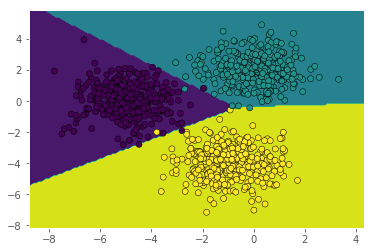

In [15]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = classifier.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

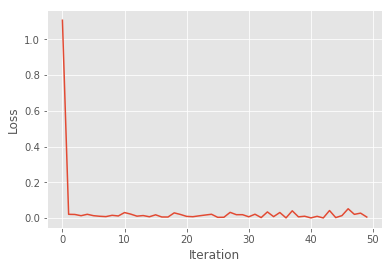

In [16]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")

C:\Users\Johan Tan\Downloads\05 - Multinomial Logistic Regression (SoftMax)\multinomial_logistic_regression.py:143: RuntimeWarning: divide by zero encountered in log
  ce = -np.sum(np.multiply(array, np.log(probs))) / N
C:\Users\Johan Tan\Downloads\05 - Multinomial Logistic Regression (SoftMax)\multinomial_logistic_regression.py:143: RuntimeWarning: invalid value encountered in multiply
  ce = -np.sum(np.multiply(array, np.log(probs))) / N
C:\Users\Johan Tan\Downloads\05 - Multinomial Logistic Regression (SoftMax)\multinomial_logistic_regression.py:246: RuntimeWarning: overflow encountered in square
  loss = softmax_ce_loss + ((reg/2)* np.sum(np.square(W)))


Train accuracy: 98.2 %


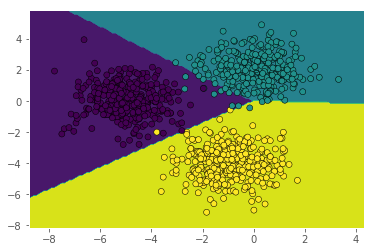

In [17]:
num_classes = 3
D = 2
classifier = MultinomialLogisticRegression(D,num_classes,std_dev = 1e-2)
loss_history = classifier.train(X, y, learning_rate=0.9, reg=0.1, num_iters=5000, batch_size=256, verbose=False)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = classifier.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

Y_train_pred = classifier.predict(X)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - y)) * 100))

In [18]:
print("Weights =", classifier.params["W"])
print("bias =",classifier.params["b"])

Weights = [[ -1.48148741e+187  -3.89197291e+186  -5.28286357e+186]
 [ -5.32938441e+185   1.30106248e+187  -1.38879280e+187]]
bias = [  0.29511413  62.32767485   9.38584836]
